# MOVIE RATING PREDICTION WITH PYTHON
## Second CodSoft DataScience Task

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/OmarHany23/CODSOFT/main/Task2_MOVIE_RATING_PREDICTION_WITH_PYTHON/IMDb%20Movies%20India.csv', encoding='latin-1')

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## PreProcessing Phase

In [4]:
def explore_data(data, message):
    """
    Display a professional overview of the DataFrame.

    Parameters:
    data (pandas DataFrame): The DataFrame to explore.
    message (str): The message to be displayed before the data overview.

    Returns:
    None: This function does not return anything, only prints the data overview.

    """
    print("\n===================================================================")
    print(f"{message}:\n")
    print(f"Number of rows: {data.shape[0]}")
    print(f"Number of features: {data.shape[1]}")
    print("\nFeatures:")
    for feature in data.columns.tolist():
        print(f" - {feature}")
    missing_values_count = data.isnull().sum().values.sum()
    print(f"\nMissing values: {missing_values_count}")
    print("\nUnique values:")
    for column in data.columns:
        unique_vals = data[column].nunique()
        print(f" - {column}: {unique_vals}")
    print("===================================================================\n")

In [5]:
#using the previous function
explore_data(data,"Exploring the data set")


Exploring the data set:

Number of rows: 15509
Number of features: 10

Features:
 - Name
 - Year
 - Duration
 - Genre
 - Rating
 - Votes
 - Director
 - Actor 1
 - Actor 2
 - Actor 3

Missing values: 33523

Unique values:
 - Name: 13838
 - Year: 102
 - Duration: 182
 - Genre: 485
 - Rating: 84
 - Votes: 2034
 - Director: 5938
 - Actor 1: 4718
 - Actor 2: 4891
 - Actor 3: 4820



In [6]:
def count_missing_values(data):
    """
    Count the missing values in each column of the DataFrame.

    Args:
    data (pandas DataFrame): The DataFrame to check for missing values.

    Returns:
    pandas Series: A series showing the count of missing values for each column.

    """
    # Calculate the sum of missing values in each column
    missing_values_count = data.isna().sum()

    # Return the series showing the count of missing values for each column
    return missing_values_count

In [7]:
# using the previous function
missing_values = count_missing_values(data)
print("Count of Missing Values:")
print(missing_values)

Count of Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [8]:
def display_data_info(data):
    """
    Display a concise summary of a DataFrame including data types and memory usage.

    Args:
    data (pandas DataFrame): The DataFrame to display the information for.

    Returns:
    None: This function does not return anything, only displays the DataFrame information.

    """
    # Display the concise summary of the DataFrame
    data.info()

In [9]:
# using the previous function
display_data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
def get_column_value_counts(data, column_name):
    """
    Get the value counts for a specific column in a DataFrame.

    Args:
    data (pandas DataFrame): The DataFrame to get the value counts from.
    column_name (str): The name of the column for which to retrieve value counts.

    Returns:
    pandas Series: A series containing the value counts for the specified column.

    """
    # Get the value counts for the specified column
    column_value_counts = data[column_name].value_counts()

    # Return the series containing the value counts for the specified column
    return column_value_counts

In [11]:
# Example usage for the 'Genre' column
genre_value_counts = get_column_value_counts(data, 'Genre')
print("Value Counts for 'Genre' column:")
print(genre_value_counts)

Value Counts for 'Genre' column:
Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64


In [12]:
def get_column_value_counts(data, column_name):
    """
    Get the value counts for a specific column in a DataFrame.

    Args:
    data (pandas DataFrame): The DataFrame to get the value counts from.
    column_name (str): The name of the column for which to retrieve value counts.

    Returns:
    pandas Series: A series containing the value counts for the specified column.

    """
    # Extract and count the occurrences of each value in the specified column
    column_value_counts = data[column_name].value_counts()

    # Return the series containing the value counts for the specified column
    return column_value_counts

In [13]:
# Example usage for the 'Director' column
director_value_counts = get_column_value_counts(data, 'Director')
print("Value Counts for 'Director' column:")
print(director_value_counts)

Value Counts for 'Director' column:
Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64


In [14]:
def get_column_value_counts(data, column_name):
    """
    Get the value counts for a specific column in a DataFrame.

    Args:
    data (pandas DataFrame): The DataFrame to get the value counts from.
    column_name (str): The name of the column for which to retrieve value counts.

    Returns:
    pandas Series: A series containing the value counts for the specified column.

    """
    # Extract and count the occurrences of each value in the specified column
    column_value_counts = data[column_name].value_counts()

    # Return the series containing the value counts for the specified column
    return column_value_counts

In [15]:
# Example usage for the 'Actor 1' column
actor1_value_counts = get_column_value_counts(data, 'Actor 1')
print("Value Counts for 'Actor 1' column:")
print(actor1_value_counts)

Value Counts for 'Actor 1' column:
Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: count, Length: 4718, dtype: int64


In [16]:
def display_head(data, num_rows=10):
    """
    Display the first few rows of a DataFrame.

    Args:
    data (pandas DataFrame): The DataFrame to display the rows from.
    num_rows (int): The number of rows to display. Default is 10.

    Returns:
    None: This function does not return anything, only displays the DataFrame rows.

    """
    # Display the first few rows of the DataFrame
    print(data.head(num_rows))

In [17]:
# Example usage to display the first 10 rows
display_head(data, num_rows=10)

                                 Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                         #Homecoming  (2021)   90 min   
3                             #Yaaram  (2019)  110 min   
4                   ...And Once Again  (2010)  105 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
7                      .in for Motion  (2008)   59 min   
8                  ?: A Question Mark  (2012)   82 min   
9                            @Andheri  (2014)  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Dra

In [18]:
def remove_null_values(data, columns_to_check):
    """
    Remove rows with null values in specific columns from a DataFrame.

    Args:
    data (pandas DataFrame): The DataFrame to remove null values from.
    columns_to_check (list): List of columns to check for null values.

    Returns:
    None: This function modifies the DataFrame in place.

    """
    # Remove rows with null values in the specified columns
    data.dropna(subset=columns_to_check, inplace=True)

    # Display the count of remaining missing values after removal
    print("Count of Missing Values:")
    print(data.isna().sum())

In [19]:
# Columns to check for null values
columns_to_check = ['Name', 'Year', 'Duration', 'Votes', 'Rating']

# Example usage
remove_null_values(data, columns_to_check)

Count of Missing Values:
Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [20]:
display_head(data)

                                  Name    Year Duration  \
1   #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                              #Yaaram  (2019)  110 min   
5                 ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                            ...Yahaan  (2005)  142 min   
8                   ?: A Question Mark  (2012)   82 min   
9                             @Andheri  (2014)  116 min   
10           1:1.6 An Ode to Lost Love  (2004)   96 min   
11                1:13:7 Ek Tera Saath  (2016)  120 min   
12                            100 Days  (1991)  161 min   
13                           100% Love  (2012)  166 min   

                        Genre  Rating  Votes           Director  \
1                       Drama     7.0      8      Gaurav Bakshi   
3             Comedy, Romance     4.4     35         Ovais Khan   
5      Comedy, Drama, Musical     4.7    827       Rahul Rawail   
6         Drama, Romance, War     7.4  1,086     Shoojit Sircar   
8   Horror, Mys

In [21]:
explore_data(data,"Exploring the data set")


Exploring the data set:

Number of rows: 5851
Number of features: 10

Features:
 - Name
 - Year
 - Duration
 - Genre
 - Rating
 - Votes
 - Director
 - Actor 1
 - Actor 2
 - Actor 3

Missing values: 387

Unique values:
 - Name: 5570
 - Year: 91
 - Duration: 178
 - Genre: 393
 - Rating: 83
 - Votes: 2030
 - Director: 2549
 - Actor 1: 2046
 - Actor 2: 2373
 - Actor 3: 2572



In [22]:
# Clean the 'Year' column by removing parentheses and converting its values to integers
data['Year'] = data['Year'].str.strip('()').astype(int)

In [23]:
# Clean the 'Votes' column by removing commas and converting its values to integers
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

In [24]:
# Clean the 'Duration' column by removing 'min' and converting its values to integers
data['Duration'] = data['Duration'].str.replace('min', '').astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.3+ KB


In [26]:
data.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [27]:
# Drop the 'Genre' column from the DataFrame
data.drop('Genre', axis=1, inplace=True)

In [28]:
data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### Initial Data Exploration

C:\Users\omarh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\omarh\AppData\Local\Temp\ipykernel_14772\121675037.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


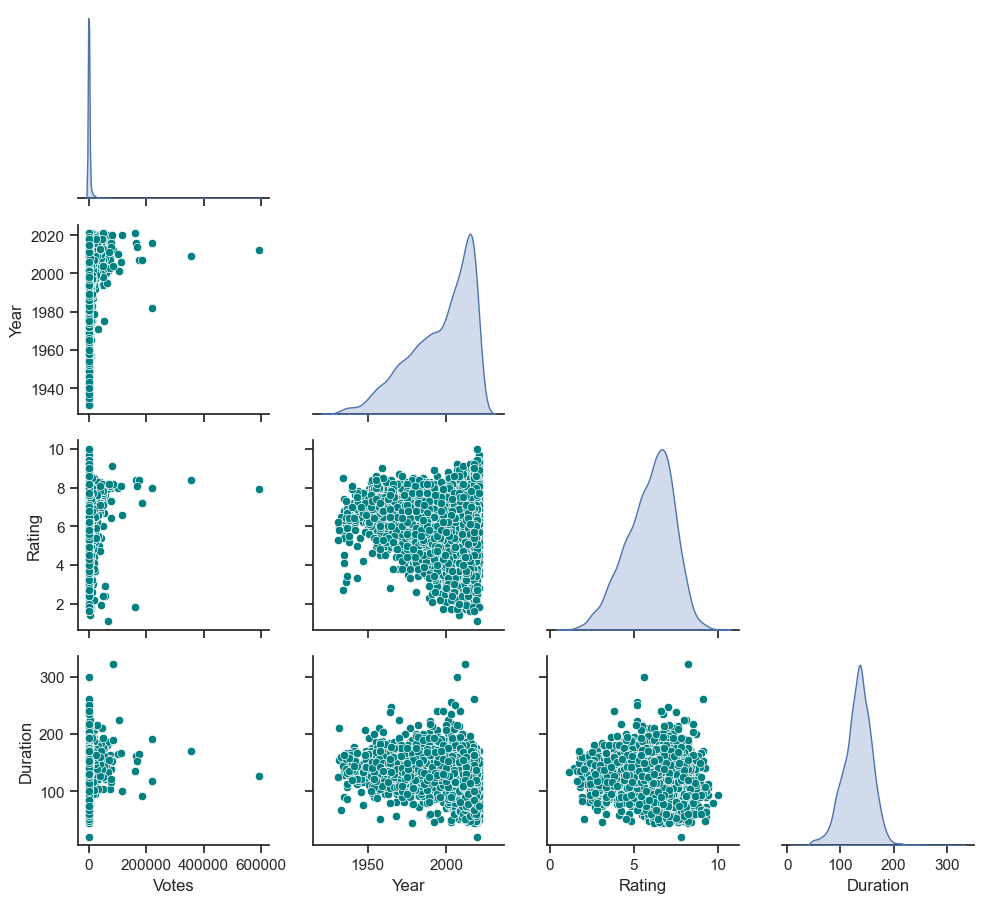

In [29]:
# Pair plot for selected columns
sns.set(style="ticks")
g = sns.pairplot(data[['Votes', 'Year', 'Rating', 'Duration']], kind='scatter', diag_kind='kde', corner=True, plot_kws={'color': 'teal'})

# Adjust layout with specific padding and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 3000x1500 with 0 Axes>

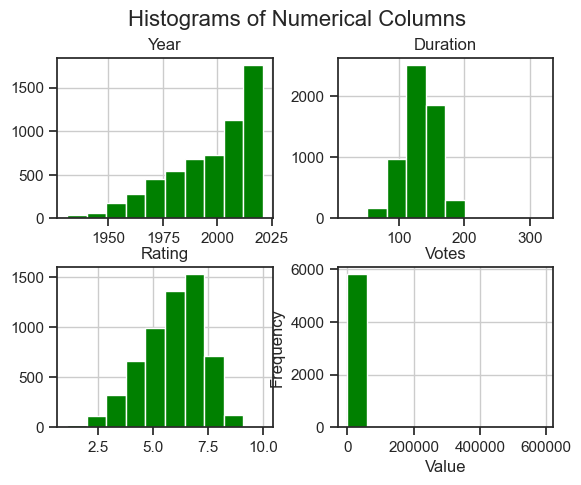

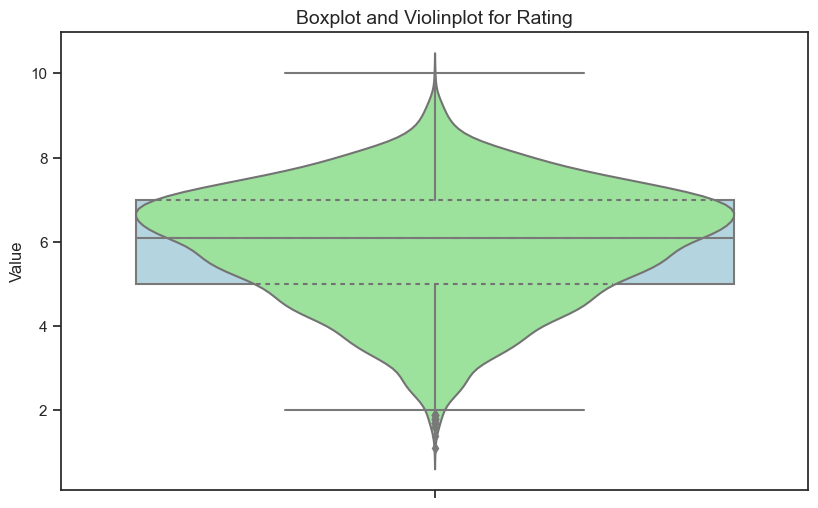

In [30]:
# Set up the figure size for the histogram
plt.figure(figsize=(30, 15))

# Generate histograms for all numerical columns in the DataFrame with a customized color
data.hist(color='green')

# Add title and labels
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

# Set up the figure size for the plots
plt.figure(figsize=(16, 10))

# Iterate over numerical columns and create boxplots and violin plots
for i, col in enumerate(data.select_dtypes(include=['int64', 'float64'])):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=col, data=data, color='lightblue')
    sns.violinplot(y=col, data=data, inner='quartile', color='lightgreen')
    plt.title(f'Boxplot and Violinplot for {col}', fontsize=14)
    plt.ylabel('Value', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

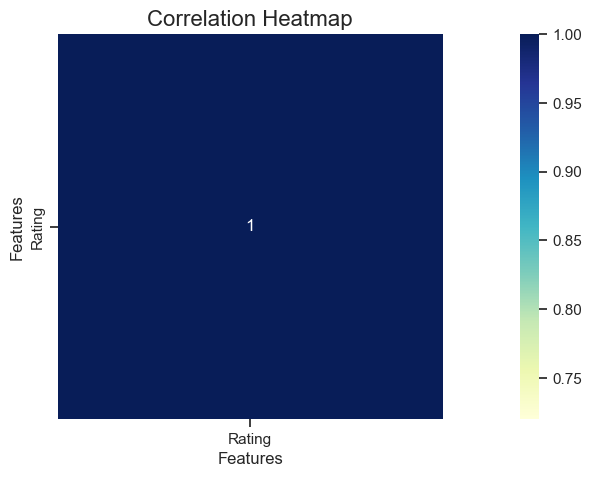

In [31]:
# Select only the numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric data
correlation_matrix = numeric_data.corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(20, 5))

# Create a heatmap to visualize the correlation matrix with a customized color map
sns.heatmap(correlation_matrix, vmax=0.8, square=True, annot=True, cmap='YlGnBu')

# Add title and labels to the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the heatmap
plt.show()

In [32]:
data.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### Feature Modifications

In [33]:
# Drop the specified columns from the DataFrame
data.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
data.head()

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326


### Preparing Test & Training Data

In [34]:
# Extract the features and target variable from the DataFrame
X = data[['Year', 'Duration', 'Votes']]  # Features
y = data['Rating']  # Target variable

In [35]:
# Split the data into training and testing sets with a 80-20 ratio and a random state of 1000 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

## Constructing the Model

In [36]:
# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))  # Step 2: Stochastic Gradient Descent Regressor
])

In [37]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [38]:
# Generate predictions on the test set using the trained pipeline
predicted_values = pipeline.predict(X_test)

## Model Evaluation

In [39]:
# Calculate Mean Absolute Error (MAE) for the pipeline's predictions
pipeline_mae = mean_absolute_error(y_test, predicted_values)

# Calculate Mean Squared Error (MSE) for the pipeline's predictions
pipeline_mse = mean_squared_error(y_test, predicted_values)

# Calculate R-squared (R2) score for the pipeline's predictions
pipeline_r2 = r2_score(y_test, predicted_values)

In [40]:
# Print the Mean Absolute Error (MAE) for the pipeline's predictions
print("Mean Absolute Error (MAE):", pipeline_mae)

# Print the Mean Squared Error (MSE) for the pipeline's predictions
print("Mean Squared Error (MSE):", pipeline_mse)

# Print the R-squared (R2) score for the pipeline's predictions
print("R-squared (R2) Score:", pipeline_r2)

Mean Absolute Error (MAE): 1.040142363499226
Mean Squared Error (MSE): 1.75589466147756
R-squared (R2) Score: 0.037929023872087186


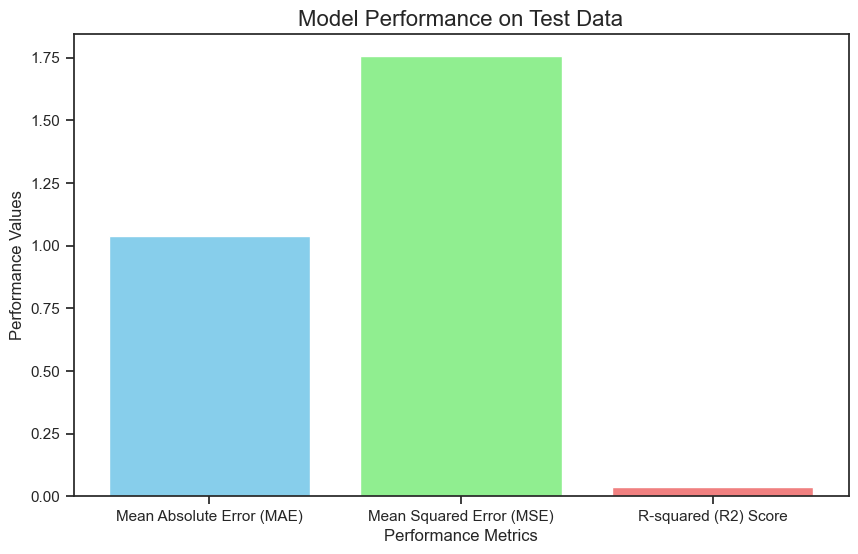

In [41]:
# Define the performance metrics and their corresponding values
performance_metrics = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R2) Score']
performance_values = [pipeline_mae, pipeline_mse, pipeline_r2]

# Create a bar plot to visualize the model performance metrics
plt.figure(figsize=(10, 6))
plt.bar(performance_metrics, performance_values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance on Test Data', fontsize=16)
plt.xlabel('Performance Metrics', fontsize=12)
plt.ylabel('Performance Values', fontsize=12)
plt.show()

## Model Implementation

In [42]:
# Create a DataFrame with new input data for prediction
new_input_data = pd.DataFrame({
    'Year': [2024],          # Input the desired year for prediction
    'Duration': [110],       # Input the desired duration in minutes for prediction
    'Votes': [12000],        # Input the desired number of votes for prediction
})

In [43]:
# Use the trained pipeline to predict the rating for the new input data
predicted_rating = pipeline.predict(new_input_data)

# Print the predicted rating based on the new input data
print("The Rating Prediction:", predicted_rating)

The Rating Prediction: [5.79469867]


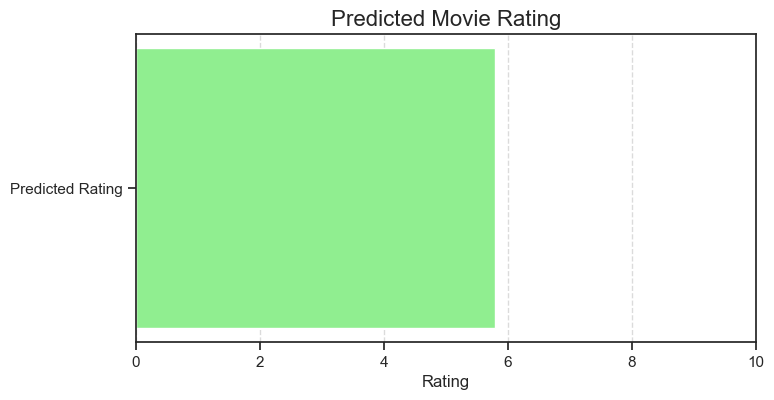

In [44]:
# Define the predicted rating
predicted_rating_value = predicted_rating[0]

# Create a horizontal bar plot to visualize the predicted rating
plt.figure(figsize=(8, 4))
plt.barh(['Predicted Rating'], [predicted_rating_value], color='lightgreen')
plt.title('Predicted Movie Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.xlim(0, 10)  # Set the x-axis limit from 0 to 10
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()